<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/MLA1_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 1**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**





In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#4. Read the file into a dataset named “df” from your Google Drive.
Here I have the file being read into a dataset, and named the dataset "df".

In [56]:
df = pd.read_csv('/content/gdrive/My Drive/CS430/weather_2012.csv')

#5. Write the code to display the first five rows of the dataset, the last five rows of the dataset and a sample of five random rows from the dataset.
Below I have code to show the first, last, and a random 5 rows of the dataset using head, tail, and sample.

In [57]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [58]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [59]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
4424,7/3/2012 8:00,21.5,10.9,51,0,48.3,100.96,Clear
2706,4/22/2012 18:00,6.5,0.0,63,24,48.3,101.13,Cloudy
5470,8/15/2012 22:00,19.9,16.0,78,7,25.0,100.76,Mainly Clear
7277,10/30/2012 5:00,13.7,10.5,81,37,25.0,99.32,Mainly Clear
3870,6/10/2012 6:00,16.6,9.6,63,0,48.3,101.36,Mainly Clear


#6. Write the code to display a list of all of the columns in the dataset.
This code will show a list of all the column names.

In [60]:
list(df)

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

#7. The column names are unwieldy for our purposes. Rename them according to this list {date_time, temp_c, dew_point, relative_humidity, wind_speed, visibility, pressure, and weather}.  
Here I rename the columns to the appropriate names.

In [61]:
df.rename(columns={'Date/Time':'date_time'},inplace=True)
df.rename(columns={'Temp (C)':'temp_c'},inplace=True)
df.rename(columns={'Dew Point Temp (C)':'dew_point'},inplace=True)
df.rename(columns={'Rel Hum (%)':'relative_humidity'},inplace=True)
df.rename(columns={'Wind Spd (km/h)':'wind_speed'},inplace=True)
df.rename(columns={'Visibility (km)':'visibility'},inplace=True)
df.rename(columns={'Stn Press (kPa)':'pressure'},inplace=True)
df.rename(columns={'Weather':'weather'},inplace=True)

#8. Most of the data in the dataset are numerical, write the code to get some standard statistics for each column (e.g. count, mean, etc.)
Here I am pulling the numerical data using .describe() which performs functions on the data to get the count, mean, min, max, etc.

In [62]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


#9. Write the code to add a column named temp_f to the dataset that contains the temperature from temp_c represented in Fahrenheit. 
Here I use the temp_c data to create a new column of data temp_f. I use the celsius temp data and perform an equation on it to get it into fahrenheit. 

In [63]:
df['temp_f'] = df.temp_c * (9/5) + 32

#10. Write the code to rearrange the columns in the dataset so temp_f appears immediately before temp_c.
Here I list the names of the columns in the order I want them, and set the df to have the new order.

In [64]:
order = ['date_time','temp_f','temp_c','dew_point','relative_humidity','wind_speed','visibility','pressure','weather']
df = df[order]

In [65]:
df.tail()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
8779,12/31/2012 19:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,32.00,0.0,-2.1,86,30,11.3,99.89,Snow


#11. Write the code to display the data types of all the columns in the dataset.
Here I am displaying the data type of all the data in the dataset.

In [66]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

#12. The date_time column is not actually considered a date by Pandas.  Write the code to convert this column to a date/time column and to verify the conversion was successful.
Here I am converting the date_time data from string variables to actual date/time variables.

In [67]:
df.date_time=pd.to_datetime(df.date_time)

#13. Write the code to get the average temperature (in F) for each month and write it into an object called monthly_avg. This object should be a Pandas Series which is similar to a Pandas Dataframe except it only has one column.  You will plot this data later.
Here I am grouping the temperatures by month and then taking the average of those groups. This will give the average temperature by month.

In [74]:
tempdatetime = df['temp_f'].groupby(df['date_time'].dt.month).mean()
tempdatetime

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64

#14. Write code to generate a scatterplot that compares the temperature against the relative humidity.  The size of your plot should be 20 x 10.
Here I creae a scatterplot using temp_f and relative_humidity.

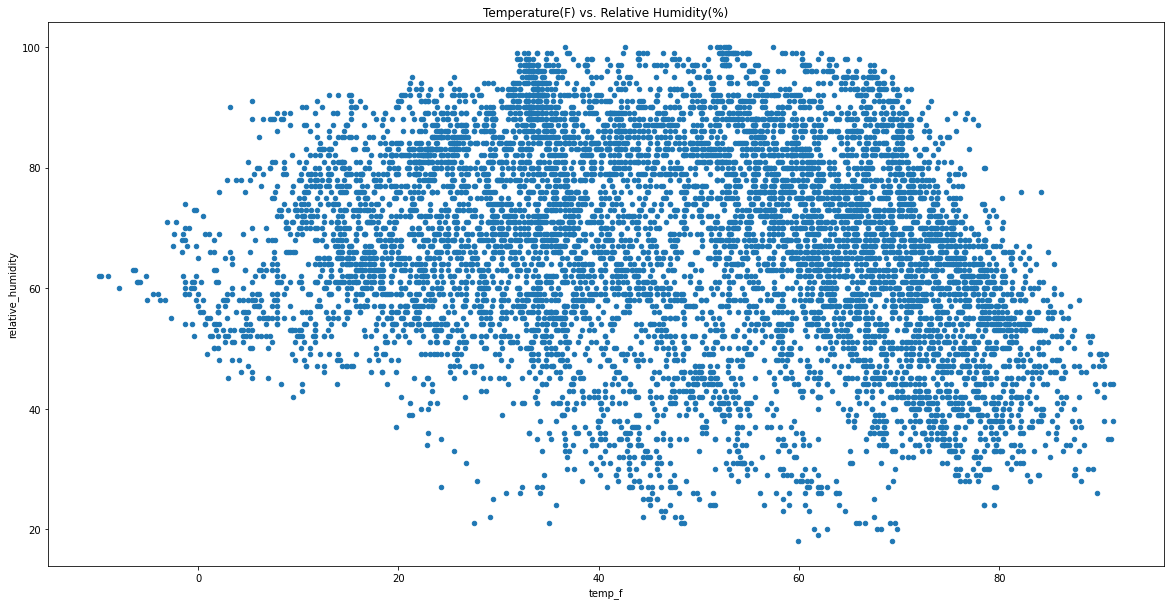

In [69]:
df.plot(kind='scatter',x='temp_f',y='relative_humidity',figsize=(20, 10),title="Temperature(F) vs. Relative Humidity(%)")

#15. Write the code to generate a line chart that shows the average temperature per month. The size of your plot should 20 x 10. 
Here I am creating a line chart using the average temperature by month

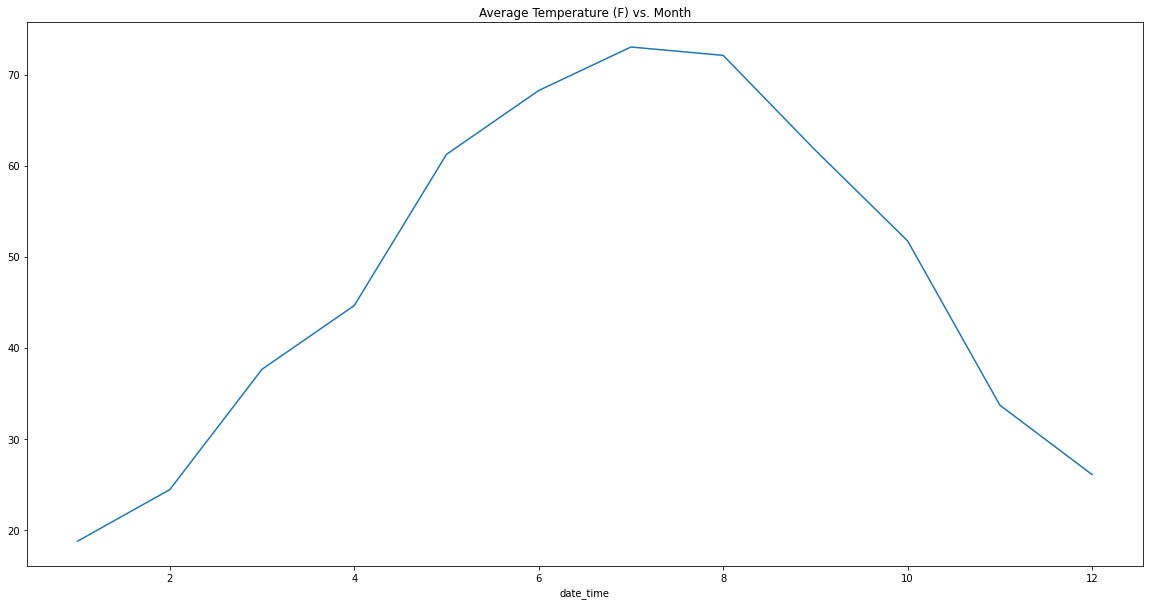

In [75]:
tempdatetime.plot(kind='line',x='date_time',y='temp_f',figsize=(20, 10),title="Average Temperature (F) vs. Month")

#16. Write the code to generate a box plot. The size of your plot should 20 x 10.
Here I am creating a box plot with the given data in the dataset.

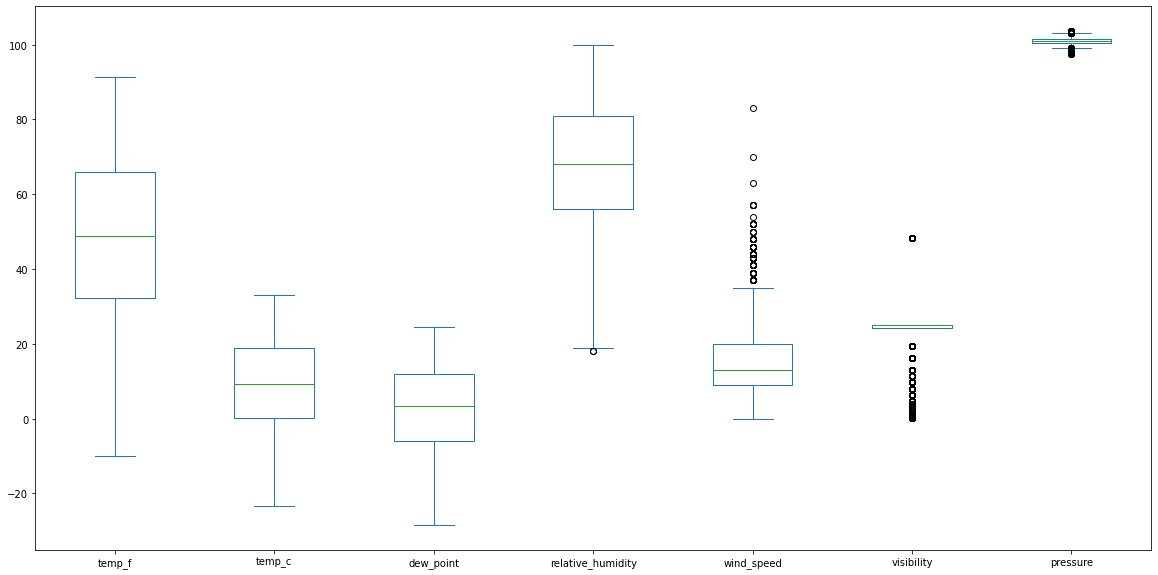

In [73]:
df.plot(kind='box',figsize=(20, 10))